In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


2024-10-03 10:42:12.802548: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 10:42:12.810210: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 10:42:12.837199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 10:42:12.875869: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 10:42:12.888173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 10:42:12.922332: I tensorflow/core/platform/cpu_feature_gu

In [2]:
data_train_path = './Fruits_Vegetables/train'
data_test_path = './Fruits_Vegetables/test'
data_val_path = './Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


2024-10-03 10:43:02.438251: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32196528 exceeds 10% of free system memory.
2024-10-03 10:43:02.460936: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72721800 exceeds 10% of free system memory.
2024-10-03 10:43:02.957365: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22018248 exceeds 10% of free system memory.
2024-10-03 10:43:03.761395: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


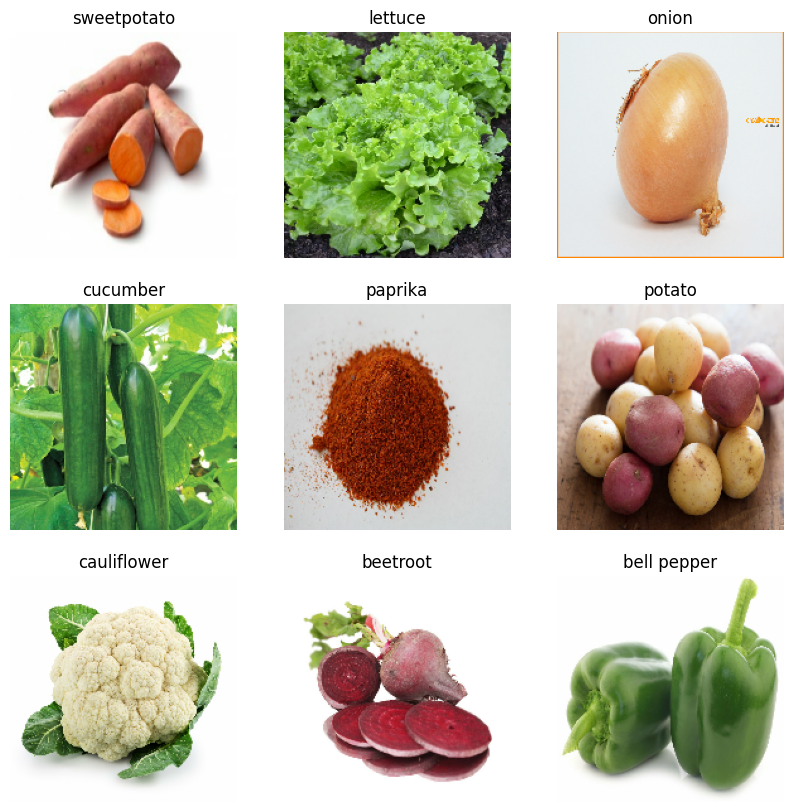

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-10-03 10:43:41.103414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.
2024-10-03 10:43:41.152801: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30261000 exceeds 10% of free system memory.
2024-10-03 10:43:41.340945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 3:40 3s/step - accuracy: 0.0143 - loss: 8.6896

2024-10-03 10:44:12.897236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 3:43 3s/step - accuracy: 0.0151 - loss: 7.8291

2024-10-03 10:44:32.854811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 3:43 3s/step - accuracy: 0.0154 - loss: 7.7127

2024-10-03 10:44:35.762317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 3:45 3s/step - accuracy: 0.0158 - loss: 7.6027

2024-10-03 10:44:40.890784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 3:44 3s/step - accuracy: 0.0162 - loss: 7.4989

2024-10-03 10:44:44.526875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 3:21 3s/step - accuracy: 0.0209 - loss: 6.5938

2024-10-03 10:45:24.058105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 3:04 3s/step - accuracy: 0.0231 - loss: 6.2498

2024-10-03 10:45:49.189337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 3:01 3s/step - accuracy: 0.0234 - loss: 6.2076

2024-10-03 10:45:52.407528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:45:53.112382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 2:56 3s/step - accuracy: 0.0239 - loss: 6.1276

2024-10-03 10:46:00.459581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 2:30 3s/step - accuracy: 0.0256 - loss: 5.8260

2024-10-03 10:46:32.819928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 2:27 3s/step - accuracy: 0.0258 - loss: 5.7973

2024-10-03 10:46:36.525868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 2:25 3s/step - accuracy: 0.0260 - loss: 5.7694

2024-10-03 10:46:39.592585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 2:21 3s/step - accuracy: 0.0262 - loss: 5.7422

2024-10-03 10:46:42.973390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 1:32 3s/step - accuracy: 0.0287 - loss: 5.4092

2024-10-03 10:47:32.968762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 3s/step - accuracy: 0.0291 - loss: 5.3555

2024-10-03 10:47:43.309958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 3s/step - accuracy: 0.0292 - loss: 5.3383

2024-10-03 10:47:47.489166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 3s/step - accuracy: 0.0297 - loss: 5.2889

2024-10-03 10:47:56.434746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.0302 - loss: 5.2272

2024-10-03 10:48:11.038110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:48:11.070419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.0305 - loss: 5.1981

2024-10-03 10:48:17.635651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.0318 - loss: 5.0789

2024-10-03 10:48:44.027082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0327 - loss: 5.0088

2024-10-03 10:49:04.705839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:49:07.517232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.0329 - loss: 4.9978 - val_accuracy: 0.1054 - val_loss: 3.1264
Epoch 2/25
10/98 ━━━━━━━━━━━━━━━━━━━━ 4:24 3s/step - accuracy: 0.0684 - loss: 3.3309

2024-10-03 10:50:33.892986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 4:28 3s/step - accuracy: 0.0707 - loss: 3.3297

2024-10-03 10:50:38.233703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 4:18 3s/step - accuracy: 0.0797 - loss: 3.3155

2024-10-03 10:50:50.722852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 4:05 3s/step - accuracy: 0.0879 - loss: 3.3016

2024-10-03 10:51:03.402574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 4:00 3s/step - accuracy: 0.0940 - loss: 3.2875

2024-10-03 10:51:13.828900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 3:41 4s/step - accuracy: 0.1118 - loss: 3.2355

2024-10-03 10:52:07.339075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 3:37 4s/step - accuracy: 0.1140 - loss: 3.2290

2024-10-03 10:52:15.881385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 3:26 4s/step - accuracy: 0.1171 - loss: 3.2192

2024-10-03 10:52:25.812517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 3:23 4s/step - accuracy: 0.1182 - loss: 3.2158

2024-10-03 10:52:30.116216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 3:15 4s/step - accuracy: 0.1204 - loss: 3.2091

2024-10-03 10:52:36.643815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 3:00 4s/step - accuracy: 0.1246 - loss: 3.1953

2024-10-03 10:52:49.928788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:52:50.035440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 2:10 4s/step - accuracy: 0.1376 - loss: 3.1461

2024-10-03 10:53:38.592219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 2:03 4s/step - accuracy: 0.1391 - loss: 3.1397

2024-10-03 10:53:46.835313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 1:53 4s/step - accuracy: 0.1414 - loss: 3.1304

2024-10-03 10:53:57.129298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:53:57.136712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 1:45 4s/step - accuracy: 0.1428 - loss: 3.1246

2024-10-03 10:54:03.543565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 1:20 3s/step - accuracy: 0.1473 - loss: 3.1059

2024-10-03 10:54:25.884464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 3s/step - accuracy: 0.1486 - loss: 3.1007

2024-10-03 10:54:32.518150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 3s/step - accuracy: 0.1492 - loss: 3.0982

2024-10-03 10:54:36.673158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.1541 - loss: 3.0783

2024-10-03 10:55:03.131966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.1547 - loss: 3.0759

2024-10-03 10:55:06.101366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.1571 - loss: 3.0661

2024-10-03 10:55:21.448465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1611 - loss: 3.0497

2024-10-03 10:55:54.861575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:55:58.232394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 412s 4s/step - accuracy: 0.1616 - loss: 3.0475 - val_accuracy: 0.5670 - val_loss: 1.9225
Epoch 3/25
 5/98 ━━━━━━━━━━━━━━━━━━━━ 5:44 4s/step - accuracy: 0.4115 - loss: 2.2939

2024-10-03 10:56:45.844822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 4:35 3s/step - accuracy: 0.3938 - loss: 2.3024

2024-10-03 10:57:13.928254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 10:57:14.361155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 3:37 3s/step - accuracy: 0.3900 - loss: 2.2975

2024-10-03 10:57:38.729590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 3:27 3s/step - accuracy: 0.3906 - loss: 2.2937

2024-10-03 10:57:43.579132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 3:15 3s/step - accuracy: 0.3919 - loss: 2.2875

2024-10-03 10:57:50.990731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 2:56 3s/step - accuracy: 0.3936 - loss: 2.2770

2024-10-03 10:58:04.212385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 2:46 3s/step - accuracy: 0.3949 - loss: 2.2698

2024-10-03 10:58:15.387769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 2:46 3s/step - accuracy: 0.3952 - loss: 2.2678

2024-10-03 10:58:19.709776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 2:43 3s/step - accuracy: 0.3955 - loss: 2.2645

2024-10-03 10:58:25.776013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 2:39 3s/step - accuracy: 0.3956 - loss: 2.2630

2024-10-03 10:58:28.419135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 2:23 3s/step - accuracy: 0.3963 - loss: 2.2549

2024-10-03 10:58:46.681275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 2:01 3s/step - accuracy: 0.3973 - loss: 2.2441

2024-10-03 10:59:10.800381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 1:52 3s/step - accuracy: 0.3977 - loss: 2.2401

2024-10-03 10:59:18.473236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 3s/step - accuracy: 0.3989 - loss: 2.2298

2024-10-03 10:59:44.146235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 3s/step - accuracy: 0.3990 - loss: 2.2288

2024-10-03 10:59:45.896975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 3s/step - accuracy: 0.3997 - loss: 2.2244

2024-10-03 10:59:55.345714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 3s/step - accuracy: 0.4000 - loss: 2.2233

2024-10-03 10:59:57.825015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.4009 - loss: 2.2183

2024-10-03 11:00:07.484432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.4014 - loss: 2.2159

2024-10-03 11:00:12.806245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.4017 - loss: 2.2146

2024-10-03 11:00:17.648579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.4022 - loss: 2.2121

2024-10-03 11:00:22.542068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4037 - loss: 2.2043

2024-10-03 11:00:40.242789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4061 - loss: 2.1930

2024-10-03 11:01:05.191254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:01:07.195445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step - accuracy: 0.4064 - loss: 2.1917 - val_accuracy: 0.7607 - val_loss: 0.9815
Epoch 4/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:04 5s/step - accuracy: 0.6562 - loss: 1.2010

2024-10-03 11:01:18.540059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 3:39 3s/step - accuracy: 0.6340 - loss: 1.2747

2024-10-03 11:01:52.916933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 3:30 3s/step - accuracy: 0.6321 - loss: 1.2823

2024-10-03 11:01:57.435661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 3:04 2s/step - accuracy: 0.6248 - loss: 1.3031

2024-10-03 11:02:15.848120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 3:02 3s/step - accuracy: 0.6240 - loss: 1.3057

2024-10-03 11:02:19.256878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 2:58 3s/step - accuracy: 0.6226 - loss: 1.3106

2024-10-03 11:02:23.902253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 2:39 3s/step - accuracy: 0.6211 - loss: 1.3205

2024-10-03 11:02:45.011645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 2:37 3s/step - accuracy: 0.6208 - loss: 1.3218

2024-10-03 11:02:48.442599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 2:33 3s/step - accuracy: 0.6203 - loss: 1.3241

2024-10-03 11:02:53.228727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 2:04 3s/step - accuracy: 0.6167 - loss: 1.3431

2024-10-03 11:03:21.344594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 2:02 3s/step - accuracy: 0.6164 - loss: 1.3447

2024-10-03 11:03:23.474813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 1:58 3s/step - accuracy: 0.6157 - loss: 1.3480

2024-10-03 11:03:30.250796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 1:47 3s/step - accuracy: 0.6139 - loss: 1.3568

2024-10-03 11:03:52.193654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 1:45 3s/step - accuracy: 0.6137 - loss: 1.3581

2024-10-03 11:03:55.384710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 1:36 3s/step - accuracy: 0.6129 - loss: 1.3623

2024-10-03 11:04:10.868140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 3s/step - accuracy: 0.6116 - loss: 1.3705

2024-10-03 11:04:49.114936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:04:49.261147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 3s/step - accuracy: 0.6115 - loss: 1.3711

2024-10-03 11:04:52.137785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 3s/step - accuracy: 0.6116 - loss: 1.3718

2024-10-03 11:04:59.465058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.6117 - loss: 1.3723

2024-10-03 11:05:06.210044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.6117 - loss: 1.3726

2024-10-03 11:05:11.164653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6123 - loss: 1.3733

2024-10-03 11:05:40.057590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6125 - loss: 1.3732

2024-10-03 11:05:42.941131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6140 - loss: 1.3702

2024-10-03 11:06:11.477944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:06:14.358817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.6143 - loss: 1.3697 - val_accuracy: 0.8547 - val_loss: 0.6046
Epoch 5/25
 8/98 ━━━━━━━━━━━━━━━━━━━━ 4:10 3s/step - accuracy: 0.7934 - loss: 0.7077

2024-10-03 11:06:46.628952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 4:07 3s/step - accuracy: 0.7926 - loss: 0.7206

2024-10-03 11:06:52.242158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 4:02 3s/step - accuracy: 0.8034 - loss: 0.6992

2024-10-03 11:07:25.634825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 4:00 3s/step - accuracy: 0.8038 - loss: 0.6981

2024-10-03 11:07:29.338882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 3:41 3s/step - accuracy: 0.8022 - loss: 0.6993

2024-10-03 11:07:56.601912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 3:30 3s/step - accuracy: 0.8012 - loss: 0.7011

2024-10-03 11:08:06.467638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 3:27 3s/step - accuracy: 0.8009 - loss: 0.7021

2024-10-03 11:08:08.845507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 2:53 3s/step - accuracy: 0.7974 - loss: 0.7202

2024-10-03 11:08:39.154093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 2:45 3s/step - accuracy: 0.7964 - loss: 0.7251

2024-10-03 11:08:51.121446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 2:38 3s/step - accuracy: 0.7958 - loss: 0.7282

2024-10-03 11:08:56.652127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 2:28 3s/step - accuracy: 0.7949 - loss: 0.7327

2024-10-03 11:09:05.549803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 2:25 3s/step - accuracy: 0.7945 - loss: 0.7343

2024-10-03 11:09:08.111153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 2:21 3s/step - accuracy: 0.7941 - loss: 0.7359

2024-10-03 11:09:10.852226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 1:40 3s/step - accuracy: 0.7903 - loss: 0.7523

2024-10-03 11:09:51.987773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 1:34 3s/step - accuracy: 0.7899 - loss: 0.7541

2024-10-03 11:09:57.716902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 3s/step - accuracy: 0.7893 - loss: 0.7565

2024-10-03 11:10:09.883000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 3s/step - accuracy: 0.7886 - loss: 0.7600

2024-10-03 11:10:24.330774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 3s/step - accuracy: 0.7884 - loss: 0.7606

2024-10-03 11:10:28.761368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 3s/step - accuracy: 0.7881 - loss: 0.7618

2024-10-03 11:10:34.054215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.7878 - loss: 0.7635

2024-10-03 11:10:48.053365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.7878 - loss: 0.7638

2024-10-03 11:10:51.227839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.7876 - loss: 0.7647

2024-10-03 11:11:05.851966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7876 - loss: 0.7651

2024-10-03 11:11:24.555312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7876 - loss: 0.7650

2024-10-03 11:11:41.768182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:11:45.088265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.7877 - loss: 0.7649 - val_accuracy: 0.8889 - val_loss: 0.4691
Epoch 6/25


2024-10-03 11:11:51.956231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 3:56 3s/step - accuracy: 0.8317 - loss: 0.5413

2024-10-03 11:12:27.386155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 3:42 3s/step - accuracy: 0.8320 - loss: 0.5443

2024-10-03 11:12:37.330785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 3:33 3s/step - accuracy: 0.8357 - loss: 0.5375

2024-10-03 11:12:48.522295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 3:29 3s/step - accuracy: 0.8378 - loss: 0.5337

2024-10-03 11:12:54.088328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 3:05 3s/step - accuracy: 0.8441 - loss: 0.5218

2024-10-03 11:13:23.529119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 3:01 3s/step - accuracy: 0.8448 - loss: 0.5201

2024-10-03 11:13:29.771256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 3:00 3s/step - accuracy: 0.8452 - loss: 0.5194

2024-10-03 11:13:34.651552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 2:59 3s/step - accuracy: 0.8455 - loss: 0.5186

2024-10-03 11:13:38.579224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 2:43 3s/step - accuracy: 0.8469 - loss: 0.5200

2024-10-03 11:14:02.672992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 2:30 3s/step - accuracy: 0.8474 - loss: 0.5221

2024-10-03 11:14:23.562645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 2:23 3s/step - accuracy: 0.8476 - loss: 0.5230

2024-10-03 11:14:28.818923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:14:28.942604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:14:29.290116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 2:09 3s/step - accuracy: 0.8477 - loss: 0.5243

2024-10-03 11:14:39.150797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 1:20 3s/step - accuracy: 0.8477 - loss: 0.5273

2024-10-03 11:15:15.509804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 1:14 3s/step - accuracy: 0.8478 - loss: 0.5272

2024-10-03 11:15:20.851649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 3s/step - accuracy: 0.8481 - loss: 0.5267

2024-10-03 11:15:30.448629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:15:31.243863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.8481 - loss: 0.5265 

2024-10-03 11:15:32.784077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-03 11:15:33.603311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8483 - loss: 0.5262

2024-10-03 11:15:37.897995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.8485 - loss: 0.5257

2024-10-03 11:15:45.089003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8494 - loss: 0.5236

KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss')

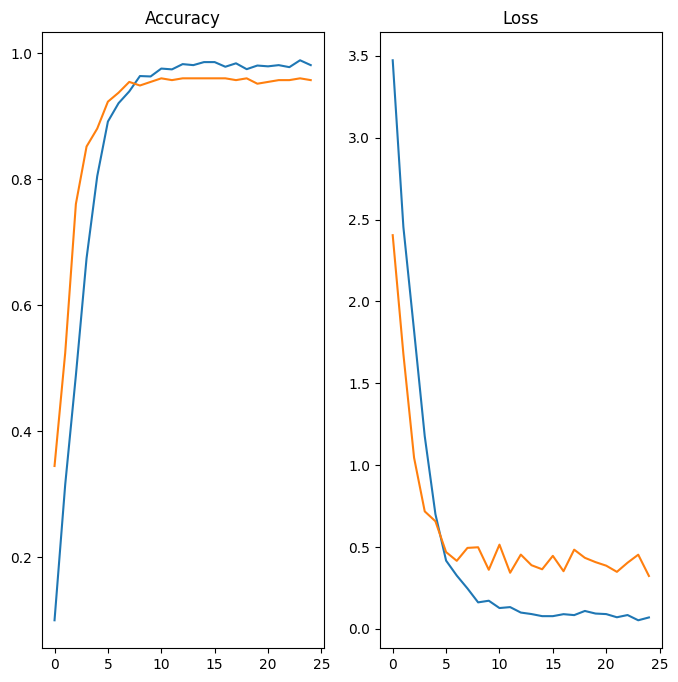

In [36]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [54]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [55]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 19ms/step


In [56]:
score = tf.nn.softmax(predict)

In [57]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 78.90


In [58]:
model.save('Image_classify.keras')